This example shows how to use the `gapstat` function with the `calcStats` option to generate statistics that can be used to create graphs similar to those shown in figure 1 in the original gap statistic paper (<a href="https://statweb.stanford.edu/~gwalther/gap">Tibshirani 2001</a>).

In [1]:
from gapstat import gapstat
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create data set with 5 clusters
n_samples = [600, 400, 500, 400, 550]
centers = [[4,4],[-4,4],[0,0],[-3.25,-3.25],[4,-4]]
cluster_std = [0.5,0.75,1.9,0.75,1.15]
max_k = 10

X,_ = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, n_features=2, random_state=2)

In [3]:
# cluster the data set using the gapstat algorithm
n_clusters, labels, W, log_W, log_W_star, gap, s = gapstat(X, clusterer=AgglomerativeClustering(),
                                                           max_k=max_k, calcStats=True)

Text(0, 0.5, 'Gap')

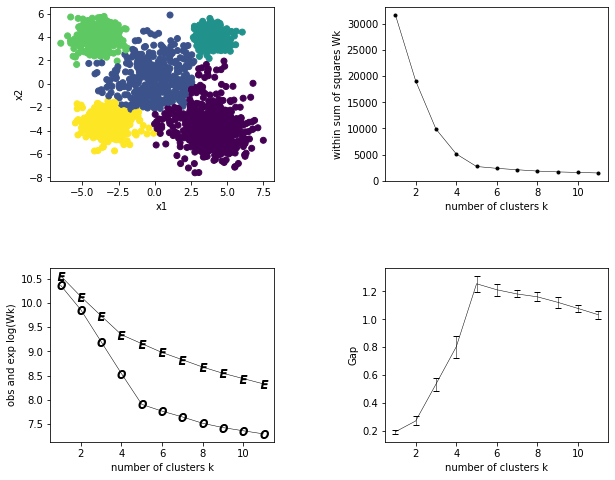

In [26]:
# create charts similar to those in the original gap statistic paper
xlabels = np.linspace(1, max_k+1, max_k+1)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

axs[0, 0].scatter(X[:,0],X[:,1],c=labels)
axs[0, 0].set_xlabel('x1')
axs[0, 0].set_ylabel('x2')

axs[0, 1].plot(xlabels, W, marker='.', color='black', linewidth=0.5)
axs[0, 1].set_xlabel('number of clusters k')
axs[0, 1].set_ylabel('within sum of squares Wk')

axs[1, 0].plot(xlabels, log_W, marker='$O$', color='black', markersize=8, linewidth=0.5)
axs[1, 0].plot(xlabels, log_W_star, marker='$E$', color='black', markersize=8, linewidth=0.5)
axs[1, 0].set_xlabel('number of clusters k')
axs[1, 0].set_ylabel('obs and exp log(Wk)')

axs[1, 1].errorbar(xlabels, gap, yerr=s, capsize=3, color='black', linewidth=0.5)
axs[1, 1].set_xlabel('number of clusters k')
axs[1, 1].set_ylabel('Gap')